In [2]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

In [3]:
data = mogptk.Data()

data.add_function(lambda x: np.sin(6*x), n=20, start=0.0, end=4.0, var=0.03, name='A')
#data.add_function(lambda x: np.sin(6*x)+2, n=20, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')

data.remove_range('A', start=2.0, end=None)

In [4]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

[{'mixture_weights': 0,
  'mixture_means': array([0.]),
  'mixture_scales': array([0.])},
 {'mixture_weights': 0,
  'mixture_means': array([0.]),
  'mixture_scales': array([0.])},
 {'mixture_weights': 0,
  'mixture_means': array([0.]),
  'mixture_scales': array([0.])}]

In [5]:
sm.estimate()
display(sm.get_params())

[{'mixture_weights': 0.5773502691896257,
  'mixture_means': array([0.96931404]),
  'mixture_scales': array([0.])},
 {'mixture_weights': 0.5773502691896257,
  'mixture_means': array([0.96737002]),
  'mixture_scales': array([0.])},
 {'mixture_weights': 0.5773502691896257,
  'mixture_means': array([1.04131166]),
  'mixture_scales': array([0.])}]

In [7]:
sm.train()
display(sm.get_params())

Building...
Instructions for updating:
Colocations handled automatically by placer.


Optimizing...
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -21.097734
  Number of iterations: 60
  Number of functions evaluations: 82
Done


[{'mixture_weights': 0.01397356776794261,
  'mixture_means': array([0.9432935]),
  'mixture_scales': array([1.e-06])},
 {'mixture_weights': 0.48092214846115816,
  'mixture_means': array([0.94329351]),
  'mixture_scales': array([1.e-06])},
 {'mixture_weights': 6.684314209329803e-06,
  'mixture_means': array([1.28857841e-06]),
  'mixture_scales': array([1.e-06])}]

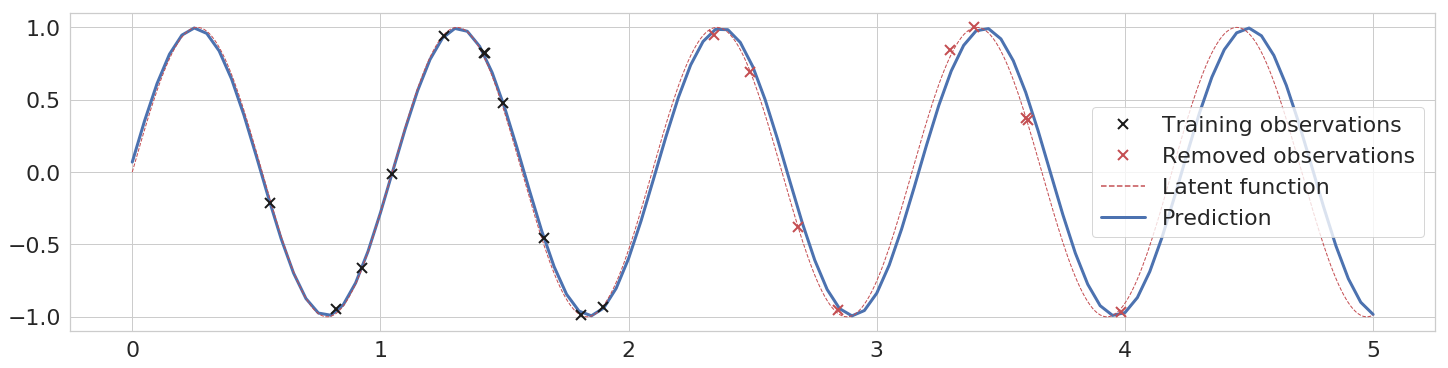

In [8]:
sm.set_prediction_range(0, 0.0, 5.0, 0.05)
sm.predict()
mogptk.plot(sm)

In [11]:
sm.save("sm_state")

In [14]:
sm2 = mogptk.load("sm_state")

/home/taco/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


[array([0.55509904, 0.82066038, 0.92662253, 1.04558165, 1.25786882,
       1.41675949, 1.42192811, 1.49283206, 1.65953974, 1.80690164,
       1.89537826])]
SM Input dims: 1
Output dims: 1
X: [array([0.55509904, 0.82066038, 0.92662253, 1.04558165, 1.25786882,
       1.41675949, 1.42192811, 1.49283206, 1.65953974, 1.80690164,
       1.89537826])]
Y: [array([-0.21453037, -0.94755696, -0.66019912, -0.01340761,  0.93768322,
        0.82303969,  0.82241454,  0.48013227, -0.45527843, -0.99042811,
       -0.92883152])] 3 [{'mixture_weights': 0.01397356776794261, 'mixture_means': array([0.9432935]), 'mixture_scales': array([1.e-06])}, {'mixture_weights': 0.48092214846115816, 'mixture_means': array([0.94329351]), 'mixture_scales': array([1.e-06])}, {'mixture_weights': 6.684314209329803e-06, 'mixture_means': array([1.28857841e-06]), 'mixture_scales': array([1.e-06])}]


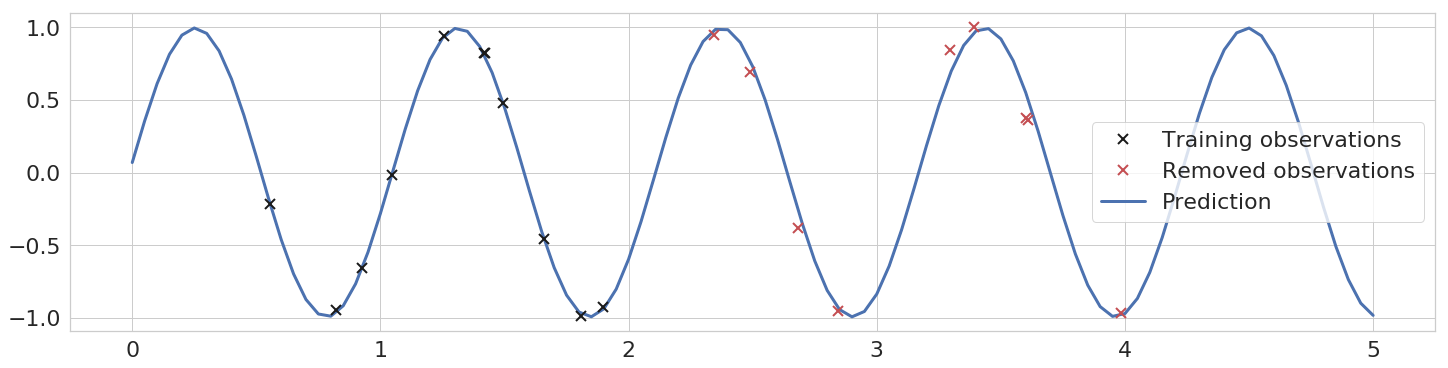

In [15]:
sm2.set_prediction_range(0, 0.0, 5.0, 0.05)
sm2.predict()
mogptk.plot(sm2)

## MOSM

In [ ]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

In [ ]:
mosm.estimate_means()
display(mosm.get_params())

In [ ]:
mosm.estimate()
display(mosm.get_params())

In [ ]:
mosm.train()
display(mosm.get_params())

In [ ]:
mosm.set_prediction_range(0, 0.0, 5.0, 0.05)
mosm.predict()
mogptk.plot(mosm)

## SM-LMC

In [ ]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

In [ ]:
smlmc.estimate()
display(smlmc.get_params())

In [ ]:
smlmc.train()
display(smlmc.get_params())

In [ ]:
smlmc.set_prediction_range(0, 0.0, 5.0, 0.05)
smlmc.set_prediction_range(1, 0.0, 5.0, 0.05)
smlmc.predict()
mogptk.plot(smlmc)

## CSM

In [ ]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

In [ ]:
csm.estimate()
display(csm.get_params())

In [ ]:
csm.train()
display(csm.get_params())

In [ ]:
csm.set_prediction_range(0, 0.0, 5.0, 0.05)
csm.set_prediction_range(1, 0.0, 5.0, 0.05)
csm.predict()
mogptk.plot(csm)

## CG

In [ ]:
cg = mogptk.CG(data, Q=3)
display(cg.get_params())

In [ ]:
cg.estimate()
display(cg.get_params())

In [ ]:
cg.train()
display(cg.get_params())

In [ ]:
cg.set_prediction_range(0, 0.0, 5.0, 0.05)
cg.set_prediction_range(1, 0.0, 5.0, 0.05)
cg.predict()
mogptk.plot(cg)